In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
column_names = [
    "Index", "Image ID", "Rating 1", "Rating 2", "Rating 3", 
    "Rating 4", "Rating 5", "Rating 6", "Rating 7", 
    "Rating 8", "Rating 9", "Rating 10", 
    "Tag 1", "Tag 2", "Challenge ID"
]

In [33]:
ava = pd.read_csv(
    "/kaggle/input/ava-aesthetic-visual-assessment/AVA_Files/AVA.txt",  # путь к вашему файлу
    delim_whitespace=True,  # разделитель — пробел
    header=None,  # отсутствует строка с заголовками
    names=column_names  # назначаем имена столбцам
)
ava = ava.drop(columns = ["Index"])

In [34]:
challenges_columns = ["Challenge ID", "Name"]
challenges = pd.read_csv(
    "/kaggle/input/ava-aesthetic-visual-assessment/AVA_Files/challenges.txt",  # путь к вашему файлу
    delim_whitespace=True,  # разделитель — пробел
    header=None,  # отсутствует строка с заголовками
    names=challenges_columns  # назначаем имена столбцам
)

найдем среднюю оценку на каждое изображение

In [35]:
challenges.head()

,Challenge ID,Name
0,1396,100_Meters
1,1004,100_Years_Old
2,1329,100_Years_Old_II
3,608,12_Days_Of_Christmas
4,311,1970s


In [39]:
tag_counts = ava["Tag 1"].value_counts() + ava["Tag 2"].value_counts()
tag_counts = tag_counts.sort_values(ascending=False)

# Получение 5 самых популярных типов
top_tags = tag_counts.head(5).index

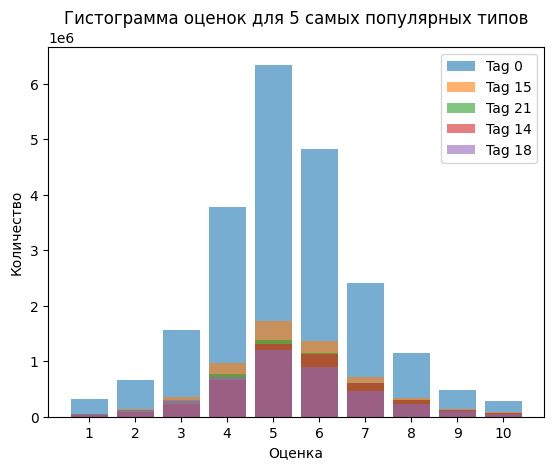

In [40]:

# Подготовка данных для гистограммы
ratings_columns = ["Rating 1", "Rating 2", "Rating 3", "Rating 4", "Rating 5", 
                   "Rating 6", "Rating 7", "Rating 8", "Rating 9", "Rating 10"]

for tag in top_tags:
    tag_data = ava[(ava["Tag 1"] == tag) | (ava["Tag 2"] == tag)]
    ratings_sum = tag_data[ratings_columns].sum()
    plt.bar(range(1, 11), ratings_sum, alpha=0.6, label=f"Tag {tag}")

# Настройки графика
plt.xticks(range(1, 11))
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.title("Гистограмма оценок для 5 самых популярных типов")
plt.legend()
plt.show()




## Обработка данных и создание Dataloader

In [ ]:
import numpy as np

In [41]:
# Вычисляем общее количество голосов
ratings = ava.iloc[:, 2:12].values  # Колонки с "Rating 1" по "Rating 10"
total_votes = np.sum(ratings, axis=1)

# Вычисляем среднюю оценку и дисперсию
ava['MeanRating'] = np.sum(ratings * np.arange(1, 11), axis=1) / total_votes
ava['Variance'] = np.sum(ratings * (np.arange(1, 11) - ava['MeanRating'].values[:, None])**2, axis=1) / total_votes

In [42]:
import pandas as pd

rating_columns = ["Rating 1", "Rating 2", "Rating 3", "Rating 4", 
                  "Rating 5", "Rating 6", "Rating 7", "Rating 8", 
                  "Rating 9", "Rating 10"]

distribution_df = ava[["Image ID"]].copy()

ava["Total Ratings"] = ava[rating_columns].sum(axis=1)


for col in rating_columns:
    distribution_df[col] = ava[col] / ava["Total Ratings"]


ava.drop(columns=["Total Ratings"], inplace=True)

distribution_df.to_csv("image_id_with_distributions.csv", index=False)


In [ ]:
distribution_df.head()

In [49]:

train_size = 200000
val_size = 1000

distribution_df = distribution_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df = distribution_df.iloc[:train_size]
val_df = distribution_df.iloc[train_size:train_size + val_size]

train_df.to_csv("train_distribution.csv", index=False)
val_df.to_csv("val_distribution.csv", index=False)

In [50]:
train_df = train_df.copy()
train_df.loc[:, "MeanRating"] = train_df[rating_columns].mul(np.arange(1, 11)).sum(axis=1)

δ = 1.5
filtered_train_df = train_df[(train_df['MeanRating'] < (5 - δ)) | (train_df['MeanRating'] > (4.5 + δ))]
filtered_train_df = filtered_train_df.drop("MeanRating", axis=1)

In [51]:
filtered_train_df

,Image ID,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Rating 6,Rating 7,Rating 8,Rating 9,Rating 10
0,3406,0.003086,0.018519,0.058642,0.080247,0.114198,0.163580,0.209877,0.157407,0.083333,0.111111
8,438070,0.000000,0.000000,0.025547,0.076642,0.248175,0.295620,0.153285,0.113139,0.047445,0.040146
12,852361,0.020690,0.006897,0.000000,0.041379,0.117241,0.186207,0.241379,0.248276,0.055172,0.082759
14,417003,0.000000,0.004016,0.044177,0.052209,0.192771,0.273092,0.216867,0.144578,0.040161,0.032129
19,603910,0.000000,0.000000,0.013699,0.041096,0.130137,0.369863,0.239726,0.123288,0.054795,0.027397
...,...,...,...,...,...,...,...,...,...,...,...
99972,518762,0.000000,0.010363,0.005181,0.067358,0.233161,0.331606,0.212435,0.088083,0.046632,0.005181
99979,673912,0.000000,0.005587,0.016760,0.044693,0.189944,0.318436,0.212291,0.094972,0.067039,0.050279
99985,152916,0.000000,0.023904,0.023904,0.087649,0.219124,0.306773,0.195219,0.067729,0.039841,0.035857
99990,681185,0.004566,0.013699,0.018265,0.022831,0.132420,0.260274,0.255708,0.187215,0.068493,0.036530


In [52]:
import pandas as pd
import numpy as np

# Предполагаем, что в distribution_df есть столбцы с вероятностями для каждого класса, например, class_1, class_2, ..., class_10

# Добавляем столбец со средней оценкой
distribution_df["mean_rating"] = distribution_df[rating_columns].mul(np.arange(1, 11), axis=1).sum(axis=1)

# Добавляем столбец с дисперсией
distribution_df["variance"] = distribution_df[rating_columns].mul(np.arange(1, 11)**2, axis=1).sum(axis=1) - distribution_df["mean_rating"]**2
highest_rated = distribution_df.nlargest(10, "mean_rating")  # 10 высокооцененных
lowest_rated = distribution_df.nsmallest(10, "mean_rating")  # 10 низкооцененных

# Средние с низкой и высокой дисперсией
mean_mask = (distribution_df["mean_rating"] >= 4.5) & (distribution_df["mean_rating"] <= 5.5)
middle_low_variance = distribution_df[mean_mask].nsmallest(10, "variance")  # 10 средних с низкой дисперсией
middle_high_variance = distribution_df[mean_mask].nlargest(10, "variance")  # 10 средних с высокой дисперсией




In [53]:
# Получаем самые высокооцененные, низкооцененные и средние
highest_rated = distribution_df.nlargest(10, "mean_rating")
lowest_rated = distribution_df.nsmallest(10, "mean_rating")

In [54]:
val_df

,Image ID,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Rating 6,Rating 7,Rating 8,Rating 9,Rating 10
100000,9382,0.008197,0.065574,0.155738,0.245902,0.245902,0.143443,0.086066,0.032787,0.012295,0.004098
100001,575335,0.000000,0.014184,0.035461,0.170213,0.404255,0.276596,0.078014,0.021277,0.000000,0.000000
100002,784049,0.004630,0.023148,0.060185,0.240741,0.236111,0.245370,0.106481,0.046296,0.032407,0.004630
100003,349840,0.003509,0.010526,0.031579,0.042105,0.185965,0.263158,0.231579,0.154386,0.049123,0.028070
100004,171355,0.002915,0.017493,0.055394,0.142857,0.311953,0.204082,0.160350,0.052478,0.029155,0.023324
...,...,...,...,...,...,...,...,...,...,...,...
100995,858157,0.027473,0.032967,0.098901,0.164835,0.302198,0.252747,0.082418,0.032967,0.005495,0.000000
100996,535961,0.005618,0.000000,0.039326,0.061798,0.101124,0.275281,0.252809,0.168539,0.056180,0.039326
100997,569355,0.006061,0.006061,0.012121,0.157576,0.400000,0.254545,0.121212,0.024242,0.018182,0.000000
100998,894524,0.018692,0.042056,0.042056,0.177570,0.373832,0.214953,0.098131,0.032710,0.000000,0.000000


In [ ]:
train_df = filtered_train_df

In [61]:
train_df

,Image ID,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Rating 6,Rating 7,Rating 8,Rating 9,Rating 10
0,3406,0.003086,0.018519,0.058642,0.080247,0.114198,0.163580,0.209877,0.157407,0.083333,0.111111
8,438070,0.000000,0.000000,0.025547,0.076642,0.248175,0.295620,0.153285,0.113139,0.047445,0.040146
12,852361,0.020690,0.006897,0.000000,0.041379,0.117241,0.186207,0.241379,0.248276,0.055172,0.082759
14,417003,0.000000,0.004016,0.044177,0.052209,0.192771,0.273092,0.216867,0.144578,0.040161,0.032129
19,603910,0.000000,0.000000,0.013699,0.041096,0.130137,0.369863,0.239726,0.123288,0.054795,0.027397
...,...,...,...,...,...,...,...,...,...,...,...
99972,518762,0.000000,0.010363,0.005181,0.067358,0.233161,0.331606,0.212435,0.088083,0.046632,0.005181
99979,673912,0.000000,0.005587,0.016760,0.044693,0.189944,0.318436,0.212291,0.094972,0.067039,0.050279
99985,152916,0.000000,0.023904,0.023904,0.087649,0.219124,0.306773,0.195219,0.067729,0.039841,0.035857
99990,681185,0.004566,0.013699,0.018265,0.022831,0.132420,0.260274,0.255708,0.187215,0.068493,0.036530


In [59]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image, UnidentifiedImageError

In [60]:
simple_transforms = transforms.Compose([  # Изменение размера изображения
    transforms.ToTensor(),         # Преобразование в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация
])

In [62]:
import torch
import torchvision.transforms.functional as F



def collater(batch):
    """
    Пакетирует батч с динамическим дополнением (Padding).
    """
    # Проверяем, что батч не пустой
    if not batch:
        raise ValueError("Пустой батч передан в collater.")

    # Определяем максимальные размеры в батче
    max_height = max(item['img'].shape[1] for item in batch)
    max_width = max(item['img'].shape[2] for item in batch)

    images = []
    labels = []


    for item in batch:
        padded_image = F.pad(item['img'],
                             (0, max_height - item['img'].size(1),max_width - item['img'].size(2), 0
                             ), 0)
        images.append(padded_image)


        # Собираем метки (распределения оценок)
        labels.append(torch.as_tensor(item['label'], dtype=torch.float32))

    # Преобразуем списки в тензоры
    images = torch.stack(images, dim=0)  # Все изображения одного размера
    labels = torch.stack(labels, dim=0)

    return images, labels



from torch.utils.data import Sampler
class AspectRatioBasedSampler(Sampler):
    def __init__(self, dataset, batch_size=1, drop_last=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last
        self.indices = list(range(len(dataset)))
        self.aspect_ratios = self._get_aspect_ratios()

    def _get_aspect_ratios(self):
        aspect_ratios = []
        for idx in self.indices:
            image = self.dataset[idx]['img']
            height, width = image.shape[1], image.shape[2]
            aspect_ratios.append(width / height)
        return aspect_ratios

    def __iter__(self):
        sorted_indices = sorted(self.indices, key=lambda idx: self.aspect_ratios[idx])
        for i in range(0, len(sorted_indices), self.batch_size):
            if self.drop_last and i + self.batch_size > len(sorted_indices):
                break
            yield sorted_indices[i:i + self.batch_size]

    def __len__(self):
        if self.drop_last:
            return len(self.indices) // self.batch_size
        return (len(self.indices) + self.batch_size - 1) // self.batch_size

In [63]:
# Безопасная загрузка изображения
def safe_image_load(img_path):
    try:
        return Image.open(img_path).convert("RGB")
    except (UnidentifiedImageError, IOError) as e:
        print(f"Ошибка загрузки изображения: {img_path}. {e}")
        return None

In [64]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image, UnidentifiedImageError

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        """
        Класс для загрузки изображений и их распределений оценок.
        
        :param dataframe: DataFrame с ID изображений и распределениями.
        :param root_dir: Папка с изображениями.
        :param transform: Преобразования для изображений.
        """
        self.annotations = dataframe  # Загружаем данные из DataFrame
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # Получаем ID изображения
        img_id = str(self.annotations.iloc[idx, 0])  # Первый столбец — Image ID
        img_path = os.path.join(self.root_dir, f"{img_id}.jpg")  # Формируем путь к изображению

        try:
            # Пытаемся загрузить изображение
            image = Image.open(img_path).convert("RGB")
        except (UnidentifiedImageError, IOError) as e:
            print(f"Ошибка загрузки изображения: {img_path}. {e}")
            # Создаём "заглушку" (чёрное изображение)
            image = Image.new("RGB", (128, 128), (0, 0, 0))

        # Применяем трансформации
        if self.transform:
            image = self.transform(image)

        # Получаем распределение оценок (остальные колонки)
        label = self.annotations.iloc[idx, 1:].values.astype(float)  # Преобразуем в float

        return {'img': image, 'label': label}

In [65]:
from torch.utils.data import DataLoader

# Предположим, ваш кастомный датасет возвращает 'img' (изображение) и 'label' (распределение оценок)
train_dataset = CustomImageDataset(dataframe = train_df, 
                                   root_dir="/kaggle/input/ava-aesthetic-visual-assessment/images", 
                                   transform=simple_transforms)

# Создаём семплер
train_sampler = AspectRatioBasedSampler(train_dataset, batch_size=4, drop_last=False)

# DataLoader с кастомным семплером и collate_fn
train_dataloader = DataLoader(train_dataset, 
                              num_workers=0, 
                              collate_fn=collater, 
                              batch_sampler=train_sampler)

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/953645.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/953645.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/567829.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/567829.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/430454.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/430454.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/104855.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/104855.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/440774.jpg. image file is truncated (12 bytes not processed)


In [69]:
from torch.utils.data import DataLoader

# Предположим, ваш кастомный датасет возвращает 'img' (изображение) и 'label' (распределение оценок)
val_dataset = CustomImageDataset(dataframe = val_df, 
                                   root_dir="/kaggle/input/ava-aesthetic-visual-assessment/images", 
                                   transform=simple_transforms)

# Создаём семплер
val_sampler = AspectRatioBasedSampler(val_dataset, batch_size=4, drop_last=False)

# DataLoader с кастомным семплером и collate_fn
val_dataloader = DataLoader(val_dataset, 
                              num_workers=0, 
                              collate_fn=collater, 
                              batch_sampler=val_sampler)

In [ ]:
batch_indices = next(iter(train_sampler))
print(f"Индексы батча: {batch_indices}")
print(f"Количество индексов в батче: {len(batch_indices)}")


In [ ]:
for idx in range(4):  # Проверим первые 4 элемента
    item = train_dataset[idx]
    print(f"Элемент {idx}:")
    print("Форма изображения:", item['img'].shape)
    print("Метки:", item['label'])

## Проверка работоспособности Dataloader

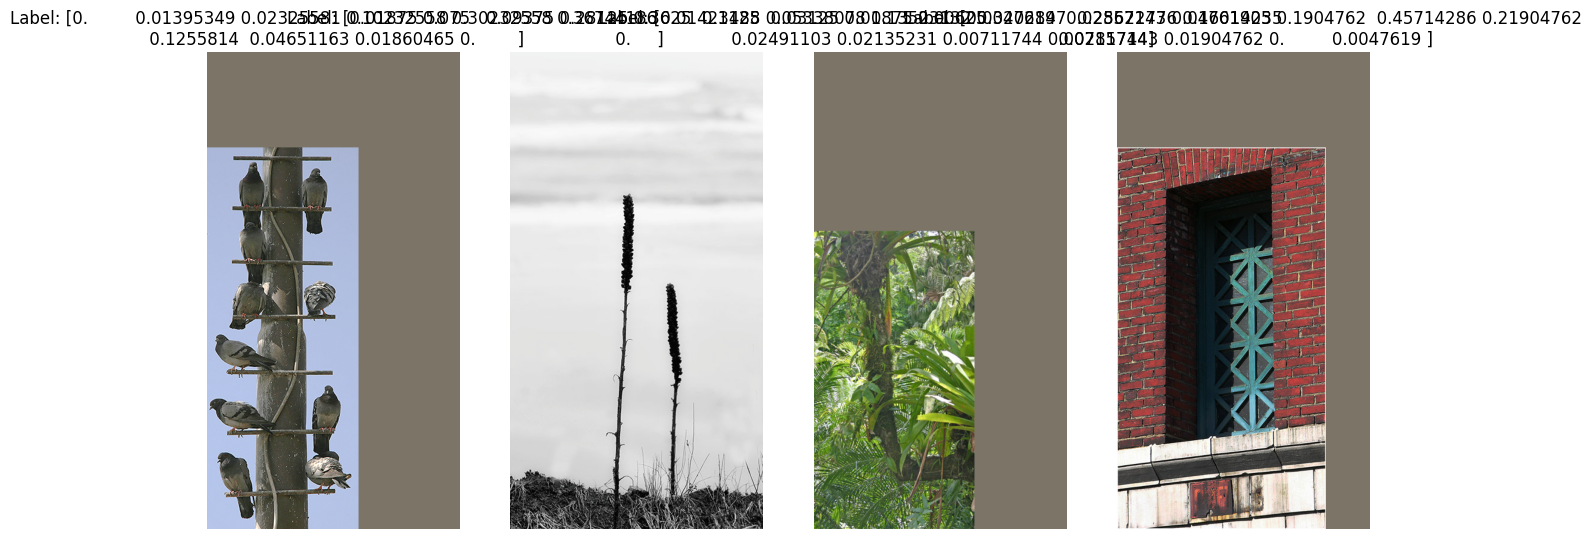

In [70]:
def denormalize(tensor, mean, std):

    # Создаём новый итератор DataLoader
    dataloader_iter = iter(dataloader)
    
    # Перематываем к нужному батчу
    for _ in range(batch_number + 1):
        try:
            images, labels = next(dataloader_iter)
        except StopIteration:
            print("Достигнут конец DataLoader.")
            return

    # Визуализация
    plt.figure(figsize=(15, 15))
    for i in range(min(num_images, images.size(0))):
        img = images[i]
        img = denormalize(img, mean, std)  
        img = F.to_pil_image(img)        
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

# Пример вызова
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# Пример вызова
visualize_specific_batch(val_dataloader, batch_number=0, num_images=4)

УРА!! это работает- он действительно подгоняет пропорции!

In [ ]:
import torch
print(f"GPU доступен: {torch.cuda.is_available()}")
print(f"Имя устройства: {torch.cuda.get_device_name(0)}")


## Обучение модели

In [72]:
!pip install -q efficientnet_pytorch

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done


In [73]:
from efficientnet_pytorch import EfficientNet

# Загружаем предобученную модель EfficientNet-B1
model = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 229MB/s]

Loaded pretrained weights for efficientnet-b0


In [75]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0.0, path='best_model.pth'):
        """
        Инициализация ранней остановки.
        :param patience: Количество эпох ожидания без улучшений.
        :param verbose: Если True, выводит сообщения о сохранении модели.
        :param delta: Минимальное изменение для улучшения.
        :param path: Путь для сохранения лучшей модели.
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

    def save_checkpoint(self, model):
        """
        Сохраняет лучшую модель.
        """
        torch.save(model.state_dict(), self.path)
        if self.verbose:
            print(f"Validation loss improved. Saving model to {self.path}")

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
from torch.utils.tensorboard import SummaryWriter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

early_stopping = EarlyStopping(patience=5, verbose=False, delta=0.0, path='best_model.pth')

def save_checkpoint(state, filename='checkpoint1.pth'):
    torch.save(state, filename)


def calculate_rmse(predictions, labels):
    predicted_means = (predictions * torch.arange(1, 11, device=predictions.device)).sum(dim=1)
    true_means = (labels * torch.arange(1, 11, device=labels.device)).sum(dim=1)
    rmse = torch.sqrt(((predicted_means - true_means) ** 2).mean()).item()
    return rmse
    
def calculate_mse(predictions, labels):
    predicted_means = (predictions * torch.arange(1, 11, device=predictions.device)).sum(dim=1)
    true_means = (labels * torch.arange(1, 11, device=labels.device)).sum(dim=1)
    mse = ((predicted_means - true_means) ** 2).mean().item()
    return mse

def train_model(model, train_loader, val_loader, criterion, optimizer, writer, start_epoch=0, val_accuracy=float('inf'), num_epochs=10):
    best_val_loss = val_accuracy

    for epoch in tqdm(range(start_epoch, num_epochs)):
        model.train()
        running_loss = 0.0
        train_rmse = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            true_means = (labels * torch.arange(1, 11, device=labels.device)).sum(dim=1)
            # Вычисляем динамический коэффициент
            
            
            outputs = model(inputs)  # Выход: распределение из 10 элементов
            predicted_means = (outputs * torch.arange(1, 11, device=outputs.device)).sum(dim=1)
            
            coefficient = 1 + predicted_means / 10.0  # Пример: масштабируем коэффициент до диапазона [1, 2]
            penalty = torch.relu(true_means - predicted_means).mean()  # Штраф за недооценку
            loss = criterion(outputs.log(), labels)  + coefficient.mean() * calculate_mse(outputs, labels) + 0.01* penalty

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            train_rmse += calculate_rmse(outputs, labels)

        train_loss = running_loss / len(train_loader)
        train_rmse = train_rmse / len(train_loader)

        writer.add_scalar("Loss/Train", train_loss, epoch)
        writer.add_scalar("RMSE/Train", train_rmse, epoch)

        val_loss, val_rmse = evaluate_model(model, val_loader, criterion)
        writer.add_scalar("Loss/Validation", val_loss, epoch)
        writer.add_scalar("RMSE/Validation", val_rmse, epoch)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}')
        
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered. Training stopped.")
            break

        if val_loss < best_val_loss:
            print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...')
            best_val_loss = val_loss

            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': val_loss,
            }
            save_checkpoint(checkpoint, 'efficientnet_best_checkpoint.pth')
        if val_loss < best_val_loss:
            print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...')
            best_val_loss = val_loss

            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': val_loss,
            }
            save_checkpoint(checkpoint, 'efficientnet_best_checkpoint.pth')

def evaluate_model(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    total_rmse = 0.0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Выход: распределение из 10 элементов
            loss = criterion(outputs.log(), labels)

            running_loss += loss.item()
            total_rmse += calculate_rmse(outputs, labels)

    avg_loss = running_loss / len(loader)
    avg_rmse = total_rmse / len(loader)
    return avg_loss, avg_rmse



class EfficientNetRegressor(nn.Module):
    def __init__(self):
        super(EfficientNetRegressor, self).__init__()
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b1')


        in_features = self.efficientnet._fc.in_features
        self.efficientnet._fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),   
            nn.Dropout(0.4),      
            
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),   
            nn.Dropout(0.3),       
            
            nn.Linear(256, 10),    
            
        )

    def forward(self, x):
        x = self.efficientnet(x)
        return torch.softmax(x, dim=1)

model = EfficientNetRegressor().to(device)
criterion = nn.KLDivLoss(reduction="batchmean")
optimizer = optim.Adam(model.parameters(), lr=1e-4)
writer = SummaryWriter(log_dir="runs/efficientnet_experiment")

assert train_dataloader is not None, "train_loader не инициализирован!"
assert val_dataloader is not None, "val_loader не инициализирован!"

train_model(model, train_dataloader, val_dataloader, criterion, optimizer, writer, num_epochs=10)
writer.close()


Loaded pretrained weights for efficientnet-b1


  0%|          | 0/10 [00:00<?, ?it/s]

Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/953645.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/953645.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/567829.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/567829.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/430454.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/430454.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/104855.jpg. [Errno 2] No such file or directory: '/kaggle/input/ava-aesthetic-visual-assessment/images/104855.jpg'
Ошибка загрузки изображения: /kaggle/input/ava-aesthetic-visual-assessment/images/440774.jpg. image file is truncated (12 bytes not processed)


  0%|          | 0/10 [28:12<?, ?it/s]

Epoch [1/10], Loss: 1.4590, Val Loss: 0.3252, Train RMSE: 0.7079, Val RMSE: 1.0944


NameError: name 'early_stopping' is not defined

## Метрика EMD между распределениями вероятностей 

In [ ]:
from scipy.stats import wasserstein_distance

def calculate_emd(p, q):
    """
    Вычисляет Earth Mover's Distance между двумя распределениями.
    :param p: Tensor с распределением 1 (должен быть 1D).
    :param q: Tensor с распределением 2 (должен быть 1D).
    :return: EMD (Wasserstein Distance).
    """
    p = p.cpu().detach().numpy()
    q = q.cpu().detach().numpy()
    return wasserstein_distance(p, q)

# Пример использования
emd_value = calculate_emd(predicted[0], true_labels[0])
print(f"EMD: {emd_value}")

## Инференс

In [ ]:
highest_rated_list = [
    {"Image ID": int(row["Image ID"]), "Distribution": row[1:].values}
    for _, row in highest_rated.iterrows()
]


In [ ]:
highest_rated_list = [
    {
        "Image ID": int(row["Image ID"]),
        "Distribution": row.iloc[1:-2].tolist()  # Извлекаем с первого до предпоследнего столбца
    }
    for _, row in highest_rated.iterrows()
]


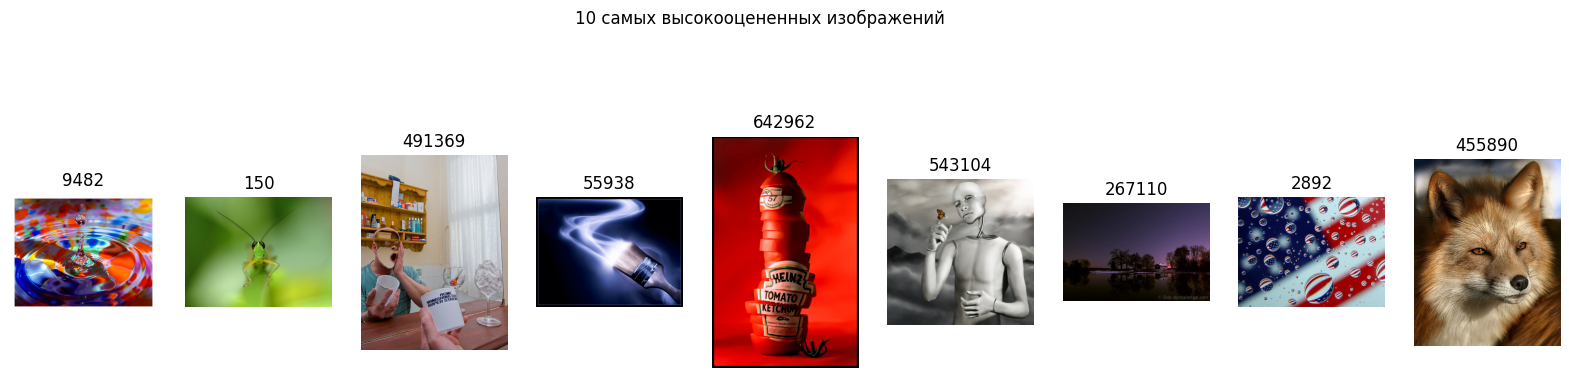

In [82]:
from PIL import Image
import matplotlib.pyplot as plt

# Функция для отображения изображений
def show_images(image_ids, root_dir, title):
    fig, axes = plt.subplots(1, len(image_ids), figsize=(20, 5))
    for idx, img_id in enumerate(image_ids):
        img_path = os.path.join(root_dir, f"{img_id}.jpg")
        image = Image.open(img_path)
        axes[idx].imshow(image)
        axes[idx].axis('off')
        axes[idx].set_title(img_id)
    plt.suptitle(title)
    plt.show()

# Пример: вывод изображений из highest_rated
highest_rated_ids = highest_rated["Image ID"].tolist()
show_images(highest_rated_ids[1:] , "/kaggle/input/ava-aesthetic-visual-assessment/images", "10 самых высокооцененных изображений")

In [83]:
import os
from PIL import Image
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

four_category = [highest_rated, lowest_rated, middle_low_variance, middle_high_variance]
category_list = []
for cat in four_category:
     category_list.append([
       {
        "Image ID": int(row["Image ID"]),
        "Distribution": row.iloc[1:-2]  # Извлекаем с первого до предпоследнего столбца
    } for _, row in cat.iterrows()
    ])

def predict_image_by_index(model, image_index, image_dir, real_distribution=None, device="cuda" if torch.cuda.is_available() else "cpu"):
    """
    Предсказывает результат модели для изображения, загруженного по индексу.

    :param model: Обученная модель PyTorch
    :param image_index: Индекс изображения (используется для формирования имени файла)
    :param image_dir: Путь к папке с изображениями
    :param real_distribution: Реальное распределение оценок (если доступно)
    :param device: Устройство для выполнения предсказания (CPU или GPU)
    :return: Предсказание модели для изображения
    """
    # Убедитесь, что модель в режиме оценки
    model.eval()
    model.to(device)

    # Формируем путь к изображению
    image_path = os.path.join(image_dir, f"{image_index}.jpg")

    # Проверяем существование файла
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Изображение с индексом {image_index} не найдено в {image_dir}")

    # Загрузка изображения
    image = Image.open(image_path).convert("RGB")

    # Простое преобразование
    simple_transform = transforms.Compose([
        transforms.Resize((256, 256)),  # Измените размер на ваш
        transforms.ToTensor(),
    ])

    # Применяем трансформации
    input_tensor = simple_transform(image).unsqueeze(0).to(device)

    # Предсказание
    with torch.no_grad():
        output = model(input_tensor)

    # Преобразуем результат в читаемый формат
    prediction = output.cpu().numpy().flatten()

    # Убедимся, что распределение нормализовано
    if not np.isclose(prediction.sum(), 1.0):
        prediction = prediction / prediction.sum()

    if real_distribution is not None:
        real_distribution = np.array(real_distribution)
        if not np.isclose(real_distribution.sum(), 1.0):
            real_distribution = real_distribution / real_distribution.sum()

    # Визуализация изображения и результатов
    plt.figure(figsize=(12, 6))

    # Исходное изображение
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Исходное изображение")

    # График распределения
    plt.subplot(1, 2, 2)
    ratings = np.arange(1, 11)  # Оценки от 1 до 10
    if real_distribution is not None:
        plt.plot(ratings, real_distribution, label="Реальное распределение", linestyle="--", marker='o')
    plt.plot(ratings, prediction, label="Предсказанное распределение", color="red", marker='x')
    plt.title("Распределения оценок")
    plt.xlabel("Оценка")
    plt.ylabel("Вероятность")
    plt.xticks(ratings)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Вычисление математического ожидания (средней оценки)
    if real_distribution is not None:
        real_mean = np.dot(ratings, real_distribution)
    else:
        real_mean = "N/A"

    predicted_mean = np.dot(ratings, prediction)

    print(f"Реальное среднее (матожидание): {real_mean}")
    print(f"Предсказанное среднее (матожидание): {predicted_mean}")

    return prediction

In [84]:
category_list[0][0]

{'Image ID': 106,
 'Distribution': Rating 1     0.000000
 Rating 2     0.000000
 Rating 3     0.000000
 Rating 4     0.000000
 Rating 5     0.018182
 Rating 6     0.045455
 Rating 7     0.118182
 Rating 8     0.254545
 Rating 9     0.263636
 Rating 10    0.300000
 Name: 3394, dtype: float64}

In [85]:
def illustrate(i):
    for cat in category_list:
        predict_image_by_index(model=model,
    image_index=cat[i]['Image ID'],
    image_dir="/kaggle/input/ava-aesthetic-visual-assessment/images",
    real_distribution=cat[i]['Distribution'])

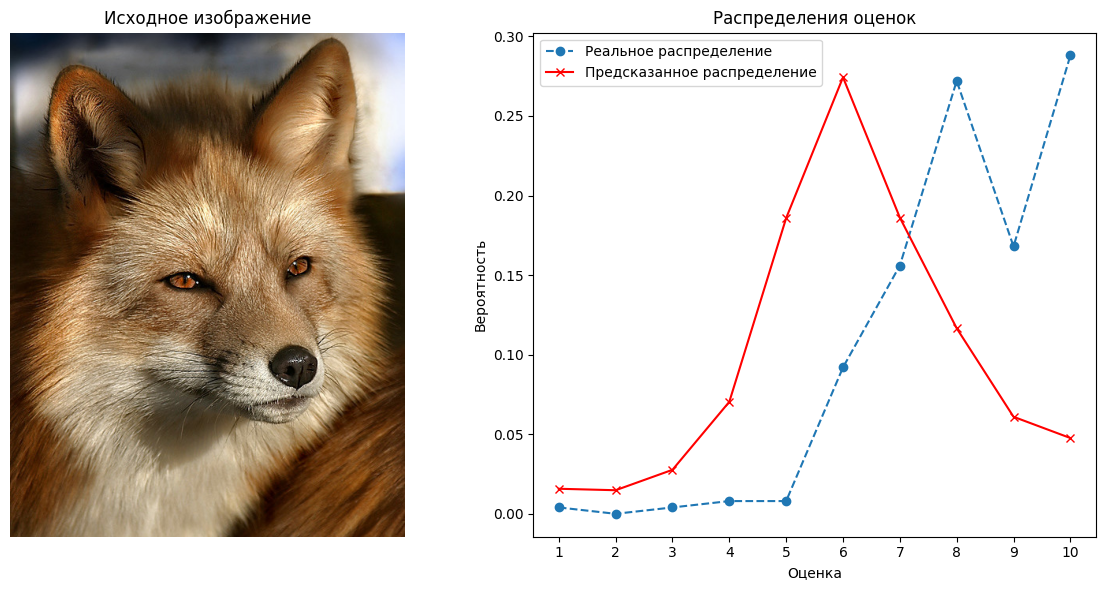

Реальное среднее (матожидание): 8.3
Предсказанное среднее (матожидание): 6.245199576020241


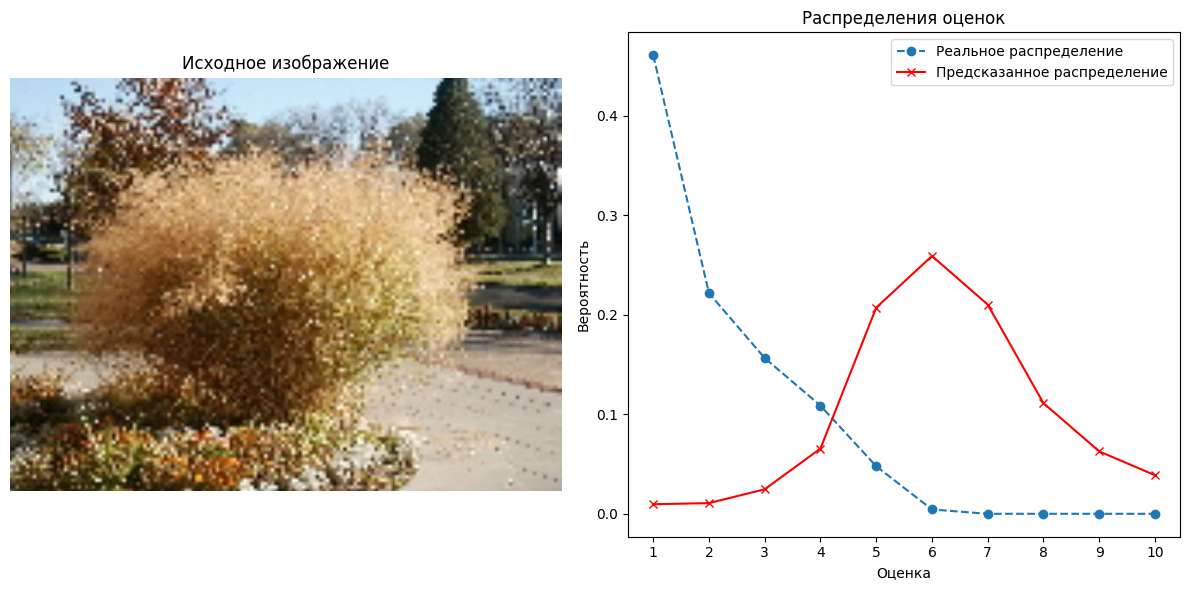

Реальное среднее (матожидание): 2.0739130434782607
Предсказанное среднее (матожидание): 6.272977272048593


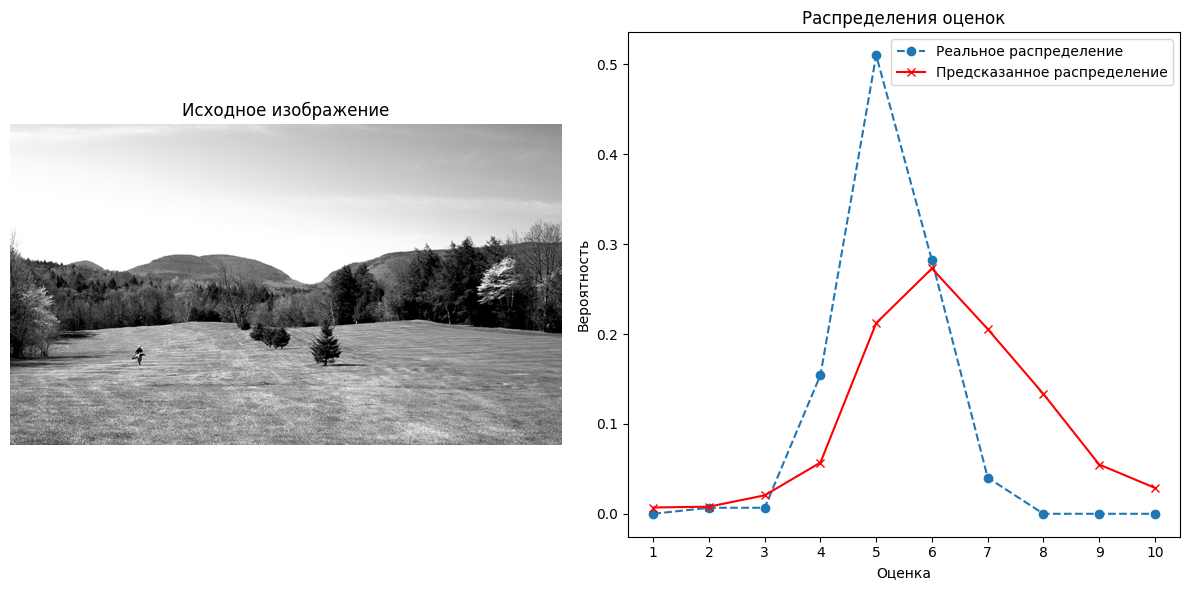

Реальное среднее (матожидание): 5.174496644295302
Предсказанное среднее (матожидание): 6.297417301218957


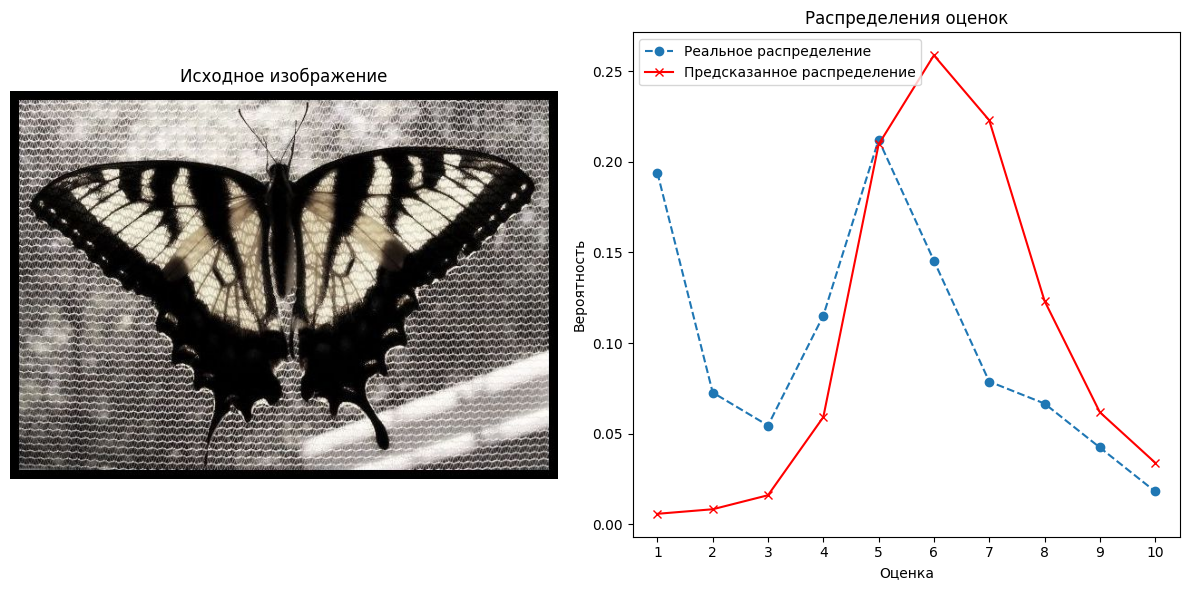

Реальное среднее (матожидание): 4.545454545454545
Предсказанное среднее (матожидание): 6.3526305933482945


In [86]:
illustrate(9)